In [38]:
import os 
import matplotlib
import pandas  as pd 
import seaborn as sns 

In [ ]:
country_military_spending = pd.read_csv('military_expenditures_in_shared_of_gdp.tsv', sep = '\t',    skiprows=5
)
us_military_spending = country_military_spending[country_military_spending['Country'] == 'United States of America']
us_military_spending

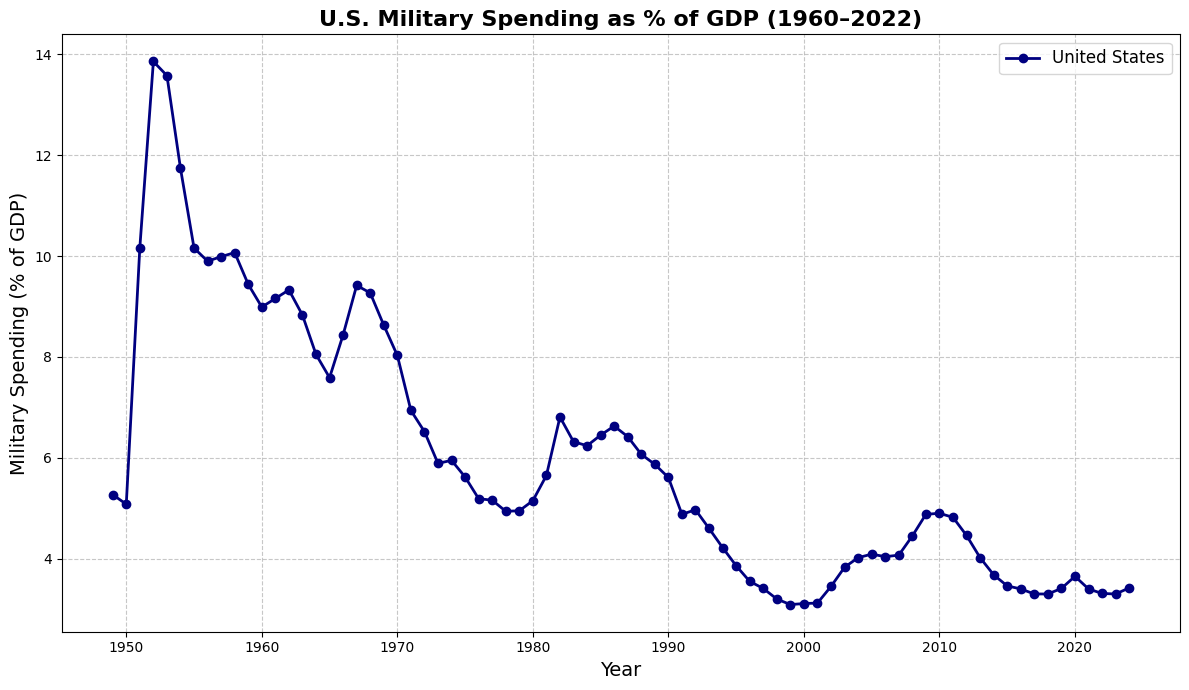

In [24]:
import matplotlib.pyplot as plt

# Melt to long format
us_long = us_military_spending.melt(
    id_vars=["Country"],
    var_name="Year",
    value_name="Spending"
)

# Convert Year to int (if they are strings)
us_long = us_long[us_long["Year"].str.isnumeric()]

us_long["Year"] = us_long["Year"].astype(int)
us_long["Spending"] = (
    us_long["Spending"]
    .replace(r"%", "", regex=True)
    .astype(float)
)
us_long["Spending"] = us_long["Spending"].astype(float)


# Improved plot
plt.figure(figsize=(12, 7))

plt.plot(
    us_long["Year"],
    us_long["Spending"],
    marker="o",
    linestyle="-",
    linewidth=2,
    markersize=6,
    color="navy",
    label="United States"
)

# Titles and labels
plt.title("U.S. Military Spending as % of GDP (1960–2022)", fontsize=16, fontweight="bold")
plt.xlabel("Year", fontsize=14)
plt.ylabel("Military Spending (% of GDP)", fontsize=14)

# Grid, legend, and styling
plt.grid(True, linestyle="--", alpha=0.7)
plt.legend(fontsize=12)
plt.tight_layout()

# Show
plt.show()

In [20]:
us_long

,Country,Year,Spending
0,United States of America,Notes,#gid=996926930&range=A55
1,United States of America,1949,5.27%
2,United States of America,1950,5.08%
3,United States of America,1951,10.17%
4,United States of America,1952,13.86%
...,...,...,...
72,United States of America,2020,3.65%
73,United States of America,2021,3.40%
74,United States of America,2022,3.31%
75,United States of America,2023,3.30%


In [28]:
import matplotlib.pyplot as plt
import pandas as pd

# NATO members (as listed in your dataset — adjust names if needed)
nato_countries = [
    "United States of America", "Canada", "United Kingdom", "France", "Germany",
    "Italy", "Spain", "Portugal", "Greece", "Turkey", "Belgium", "Netherlands",
    "Luxembourg", "Norway", "Denmark", "Iceland", "Poland", "Czech Republic",
    "Hungary", "Slovakia", "Slovenia", "Romania", "Bulgaria", "Estonia",
    "Latvia", "Lithuania", "Croatia", "Albania", "Montenegro", "North Macedonia"
]

# Load dataset
country_military_spending = pd.read_csv(
    "military_expenditures_in_shared_of_gdp.tsv",
    sep="\t",
    skiprows=5
)

# Keep only NATO members
nato_spending = country_military_spending[
    country_military_spending["Country"].isin(nato_countries)
]

# Reshape to long format
nato_long = nato_spending.melt(
    id_vars=["Country"],
    var_name="Year",
    value_name="Spending"
)

# Keep only numeric years
nato_long = nato_long[nato_long["Year"].str.isnumeric()]
nato_long["Year"] = nato_long["Year"].astype(int)
nato_long = nato_long[nato_long["Spending"] != "..."]

'''
# Clean Spending values
nato_long["Spending"] = (
    nato_long["Spending"]
    .replace(r"%", "", regex=True)
    .astype(float)
)

# Plot
plt.figure(figsize=(14, 8))

for country in nato_countries:
    data = nato_long[nato_long["Country"] == country]
    plt.plot(data["Year"], data["Spending"], linewidth=1.5, label=country)

# Titles and labels
plt.title("NATO Countries – Military Spending as % of GDP Over Time", fontsize=16, fontweight="bold")
plt.xlabel("Year", fontsize=14)
plt.ylabel("Military Spending (% of GDP)", fontsize=14)

# Grid, legend, styling
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend(fontsize=9, ncol=3, bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()

plt.show()
'''

'\n# Clean Spending values\nnato_long["Spending"] = (\n    nato_long["Spending"]\n    .replace(r"%", "", regex=True)\n    .astype(float)\n)\n\n# Plot\nplt.figure(figsize=(14, 8))\n\nfor country in nato_countries:\n    data = nato_long[nato_long["Country"] == country]\n    plt.plot(data["Year"], data["Spending"], linewidth=1.5, label=country)\n\n# Titles and labels\nplt.title("NATO Countries – Military Spending as % of GDP Over Time", fontsize=16, fontweight="bold")\nplt.xlabel("Year", fontsize=14)\nplt.ylabel("Military Spending (% of GDP)", fontsize=14)\n\n# Grid, legend, styling\nplt.grid(True, linestyle="--", alpha=0.6)\nplt.legend(fontsize=9, ncol=3, bbox_to_anchor=(1.05, 1), loc="upper left")\nplt.tight_layout()\n\nplt.show()\n'

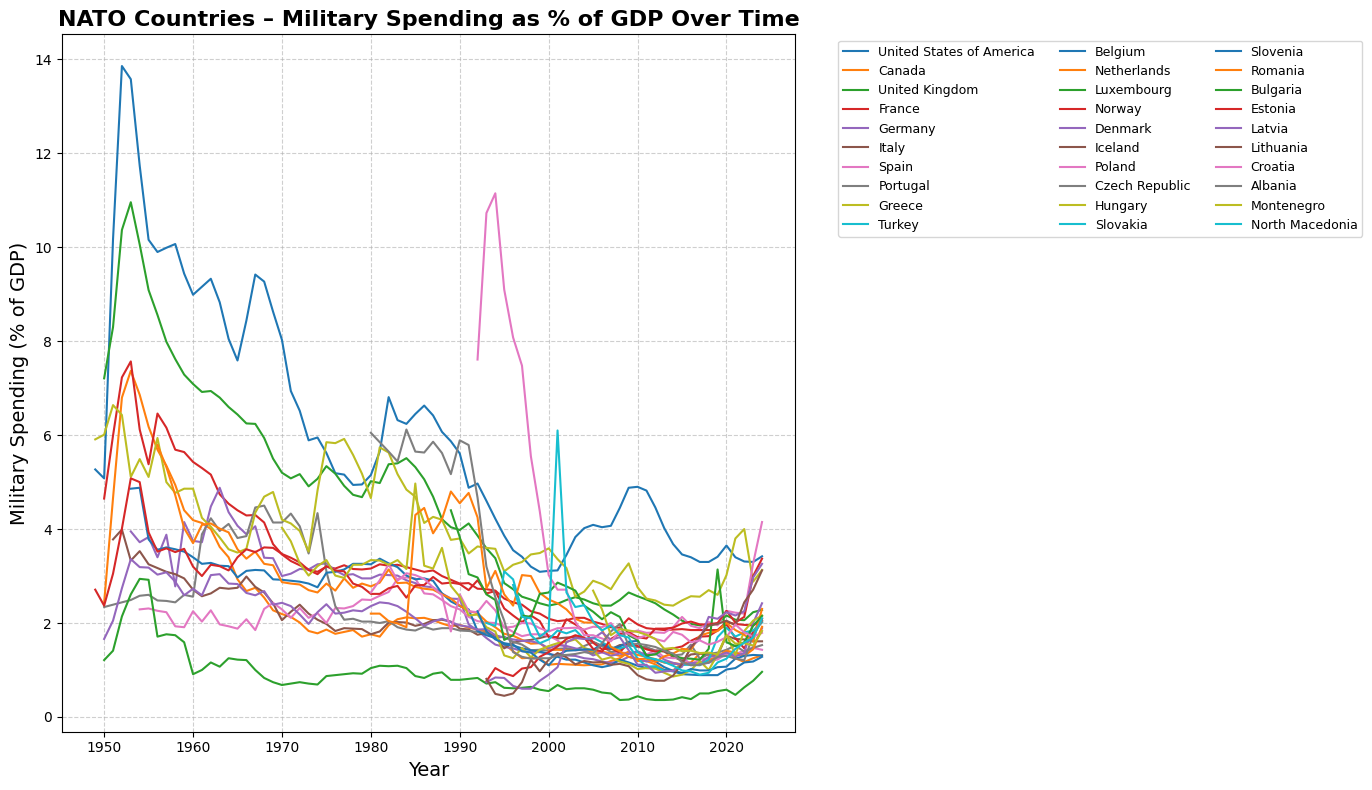

In [30]:
# Clean Spending values
nato_long["Spending"] = (
    nato_long["Spending"]
    .replace(r"%", "", regex=True)
    .astype(float)
)

# Plot
plt.figure(figsize=(14, 8))

for country in nato_countries:
    data = nato_long[nato_long["Country"] == country]
    plt.plot(data["Year"], data["Spending"], linewidth=1.5, label=country)

# Titles and labels
plt.title("NATO Countries – Military Spending as % of GDP Over Time", fontsize=16, fontweight="bold")
plt.xlabel("Year", fontsize=14)
plt.ylabel("Military Spending (% of GDP)", fontsize=14)

# Grid, legend, styling
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend(fontsize=9, ncol=3, bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()

plt.show()

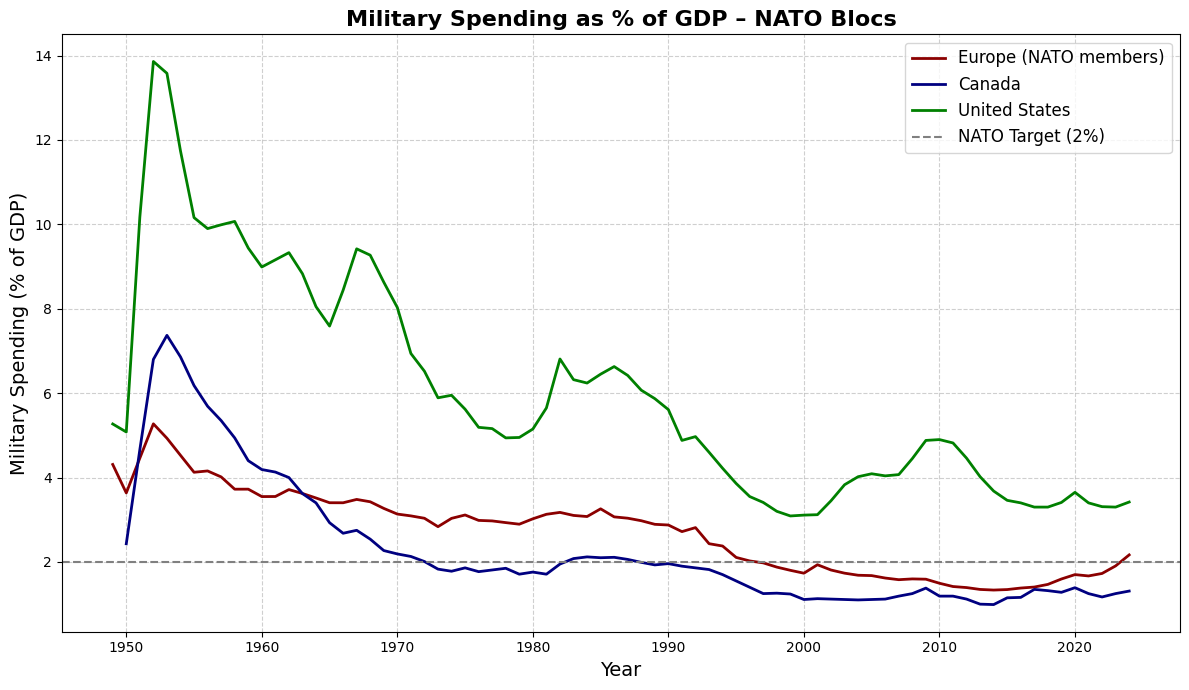

In [34]:
# List of European NATO countries (exclude US & Canada)
# European NATO members
european_nato = [
    "Albania",
    "Belgium",
    "Bulgaria",
    "Croatia",
    "Czechia",
    "Denmark",
    "Estonia",
    "France",
    "Germany",
    "Greece",
    "Hungary",
    "Iceland",
    "Italy",
    "Latvia",
    "Lithuania",
    "Luxembourg",
    "Montenegro",
    "Netherlands",
    "North Macedonia",
    "Norway",
    "Poland",
    "Portugal",
    "Romania",
    "Slovakia",
    "Slovenia",
    "Spain",
    "United Kingdom",
    "Türkiye"   # transcontinental but NATO member, listed as "Türkiye" in SIPRI
]

# Canada
canada_nato = ["Canada"]

# United States
us_nato = ["United States of America"]

europe_long = nato_long[nato_long["Country"].isin(european_nato)]

import matplotlib.pyplot as plt

# --- Compute averages for each group ---

# Europe
europe_avg = (
    nato_long[nato_long["Country"].isin(european_nato)]
    .groupby("Year")["Spending"]
    .mean()
    .reset_index()
)

# Canada
canada_avg = (
    nato_long[nato_long["Country"].isin(canada_nato)]
    .groupby("Year")["Spending"]
    .mean()
    .reset_index()
)

# United States
us_avg = (
    nato_long[nato_long["Country"].isin(us_nato)]
    .groupby("Year")["Spending"]
    .mean()
    .reset_index()
)

# --- Plot ---
plt.figure(figsize=(12, 7))

plt.plot(europe_avg["Year"], europe_avg["Spending"], label="Europe (NATO members)", linewidth=2, color="darkred")
plt.plot(canada_avg["Year"], canada_avg["Spending"], label="Canada", linewidth=2, color="navy")
plt.plot(us_avg["Year"], us_avg["Spending"], label="United States", linewidth=2, color="green")

# Add NATO 2% guideline
plt.axhline(2, color="gray", linestyle="--", linewidth=1.5, label="NATO Target (2%)")

# Titles & labels
plt.title("Military Spending as % of GDP – NATO Blocs", fontsize=16, fontweight="bold")
plt.xlabel("Year", fontsize=14)
plt.ylabel("Military Spending (% of GDP)", fontsize=14)

# Grid & legend
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

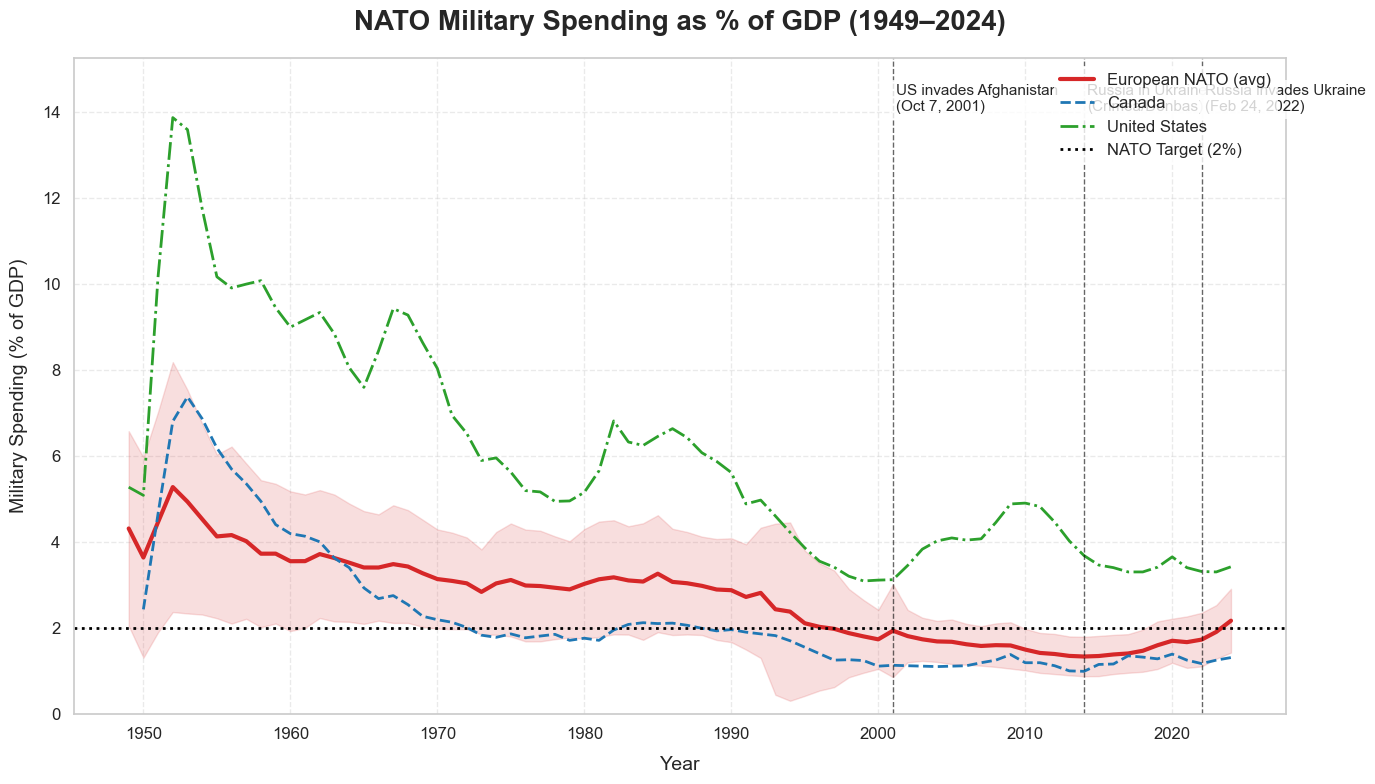

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

# --- Compute European mean + std ---
europe_grouped = (
    nato_long[nato_long["Country"].isin(european_nato)]
    .groupby(["Year"])["Spending"]
)

europe_mean = europe_grouped.mean()
europe_std = europe_grouped.std()

# --- Plot ---
plt.figure(figsize=(14, 8))

# European average with ±1 std shading
plt.fill_between(
    europe_mean.index,
    europe_mean - europe_std,
    europe_mean + europe_std,
    color="#d62728", alpha=0.15, # label="Europe ±1 SD"
)
plt.plot(
    europe_mean.index, europe_mean,
    label="European NATO (avg)", linewidth=3, color="#d62728"
)

# Canada
plt.plot(
    canada_avg["Year"], canada_avg["Spending"],
    label="Canada", linewidth=2, linestyle="--", color="#1f77b4"
)

# United States
plt.plot(
    us_avg["Year"], us_avg["Spending"],
    label="United States", linewidth=2, linestyle="-.", color="#2ca02c"
)

# NATO 2% guideline
plt.axhline(2, color="black", linestyle=":", linewidth=2, label="NATO Target (2%)")

# Titles & labels
plt.title("NATO Military Spending as % of GDP (1949–2024)", fontsize=20, fontweight="bold", pad=20)
plt.xlabel("Year", fontsize=14, labelpad=10)
plt.ylabel("Military Spending (% of GDP)", fontsize=14, labelpad=10)

# Legend inside
plt.legend(
    fontsize=12, frameon=True, facecolor="white", edgecolor="none",
    loc="upper right"
)

# Ticks and limits
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(0, max(us_avg["Spending"].max(), (europe_mean + europe_std).max()) * 1.1)

# Subtle grid
plt.grid(True, linestyle="--", alpha=0.4)

# --- Event markers ---
events = [
    (2001, "US invades Afghanistan\n(Oct 7, 2001)"),
    (2014, "Russia in Ukraine\n(Crimea/Donbas)"),
    (2022, "Russia invades Ukraine\n(Feb 24, 2022)"),
]

# Draw vertical lines
for x, label in events:
    plt.axvline(x=x, color="black", linestyle="--", linewidth=1, alpha=0.6)

# Place labels near the top of the chart
ymax = plt.gca().get_ylim()[1]
for x, label in events:
    plt.text(
        x + 0.2,                     # slight nudge right so it doesn't sit on the line
        ymax * 0.96,                 # near top of plot
        label,
        fontsize=11,
        va="top",
        ha="left",
        bbox=dict(facecolor="white", edgecolor="none", alpha=0.8, pad=3)
    )


plt.tight_layout()
plt.show()


In [36]:
!pip install seaborn

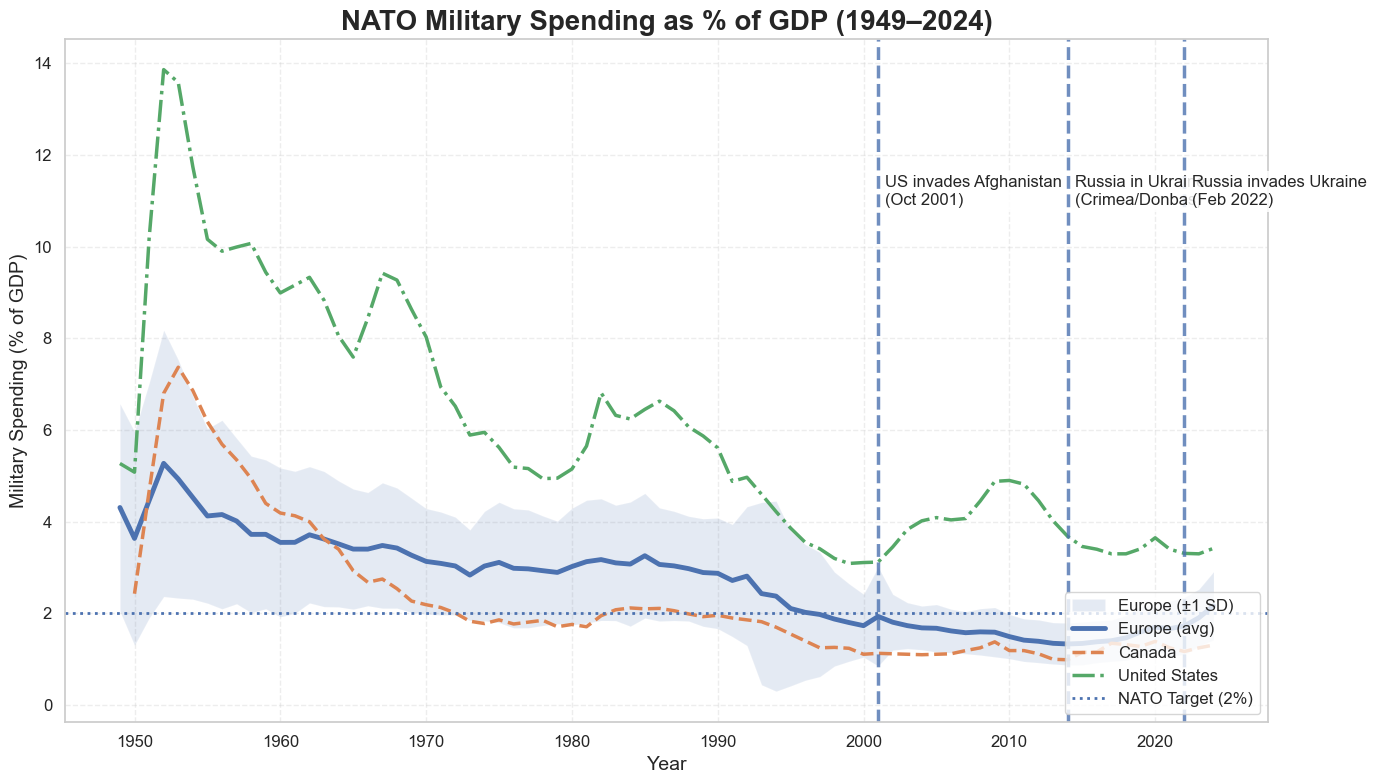

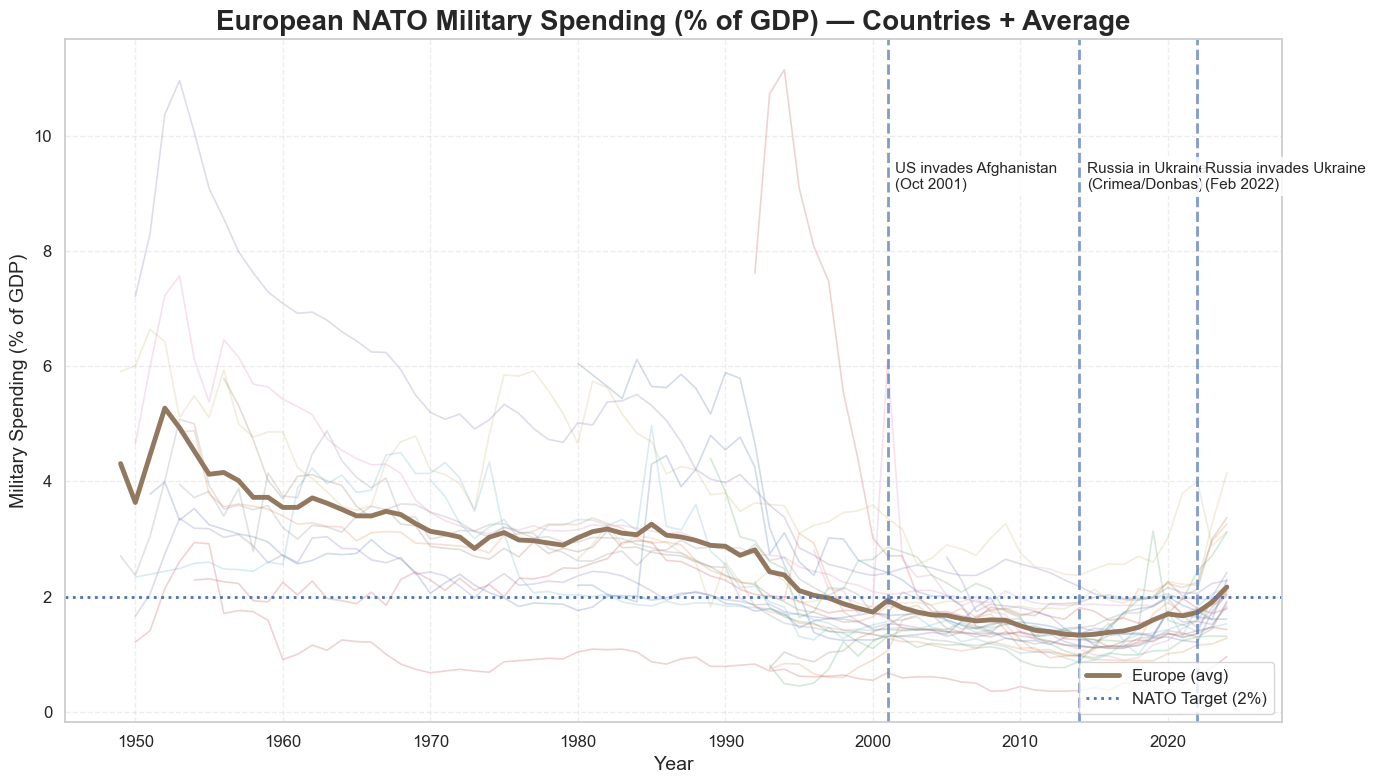

In [44]:
# -----------------------
# 3) Style helpers
# -----------------------
def set_pubstyle():
    plt.rcParams.update({
        "figure.figsize": (14, 8),
        "axes.grid": True,
        "grid.linestyle": "--",
        "grid.alpha": 0.35,
        "axes.titlesize": 20,
        "axes.titleweight": "bold",
        "axes.labelsize": 14,
        "xtick.labelsize": 12,
        "ytick.labelsize": 12,
        "legend.fontsize": 12
    })

# -----------------------
# 4) Figure A: Bloc comparison (Europe avg + ±1 SD, Canada, US)
# -----------------------
set_pubstyle()
plt.figure()

# European average (thick) + ±1 SD band (subtle)
plt.fill_between(
    europe_mean.index,
    (europe_mean - europe_std).values,
    (europe_mean + europe_std).values,
    alpha=0.15,
    label="Europe (±1 SD)"
)
plt.plot(
    europe_mean.index, europe_mean.values,
    linewidth=3.5,
    label="Europe (avg)"
)

# Canada & US (thicker than default)
plt.plot(
    canada_avg["Year"], canada_avg["Spending"],
    linewidth=2.5,
    linestyle="--",
    label="Canada"
)
plt.plot(
    us_avg["Year"], us_avg["Spending"],
    linewidth=2.5,
    linestyle="-.",
    label="United States"
)

# NATO 2% guideline
plt.axhline(2, linestyle=":", linewidth=2, label="NATO Target (2%)")

# Event markers (thicker, labels away from legend)
events = [
    (2001, "US invades Afghanistan\n(Oct 2001)"),
    (2014, "Russia in Ukraine\n(Crimea/Donbas)"),
    (2022, "Russia invades Ukraine\n(Feb 2022)")
]
for x, _ in events:
    plt.axvline(x=x, linestyle="--", linewidth=2.5, alpha=0.8)

# Title/labels
plt.title("NATO Military Spending as % of GDP (1949–2024)")
plt.xlabel("Year")
plt.ylabel("Military Spending (% of GDP)")

# Legend bottom-right to avoid event labels
plt.legend(loc="lower right", frameon=True)

# Place labels after limits are known
ymin, ymax = plt.gca().get_ylim()
for x, label in events:
    plt.text(
        x + 0.5, ymin + 0.80*(ymax - ymin),  # lower than the top; avoids legend
        label, fontsize=12, va="top", ha="left",
        bbox=dict(facecolor="white", edgecolor="none", alpha=0.85, pad=3)
    )

plt.tight_layout()
plt.show()

# -----------------------
# 5) Figure B (optional): European “spaghetti” plot
#     Faint lines for each country + bold European average
# -----------------------
want_spaghetti = True
if want_spaghetti:
    set_pubstyle()
    plt.figure()

    # Faint per-country lines to reduce clutter
    for c in sorted(european_nato):
        d = nato_long[(nato_long["Country"] == c)]
        if d.empty: 
            continue
        d = d.sort_values("Year")
        plt.plot(d["Year"], d["Spending"], linewidth=1.2, alpha=0.25)

    # Bold European average on top
    plt.plot(
        europe_mean.index, europe_mean.values,
        linewidth=3.5, label="Europe (avg)"
    )

    # 2% guideline
    plt.axhline(2, linestyle=":", linewidth=2, label="NATO Target (2%)")

    # Event markers (same placement approach)
    for x, _ in events:
        plt.axvline(x=x, linestyle="--", linewidth=2.0, alpha=0.7)

    plt.title("European NATO Military Spending (% of GDP) — Countries + Average")
    plt.xlabel("Year")
    plt.ylabel("Military Spending (% of GDP)")
    plt.legend(loc="lower right", frameon=True)

    # Label events below the top to avoid clutter
    ymin, ymax = plt.gca().get_ylim()
    for x, label in events:
        plt.text(
            x + 0.5, ymin + 0.82*(ymax - ymin),
            label, fontsize=11, va="top", ha="left",
            bbox=dict(facecolor="white", edgecolor="none", alpha=0.85, pad=3)
        )

    plt.tight_layout()
    plt.show()

In [50]:
# Build a long-form dataframe for ALL countries (no NATO filter)
all_long = country_military_spending.melt(
    id_vars=["Country"],
    var_name="Year",
    value_name="Spending"
)

# Clean it the same way
all_long = all_long[all_long["Year"].astype(str).str.isnumeric()].copy()
all_long["Year"] = all_long["Year"].astype(int)

all_long = all_long[~all_long["Spending"].isin(["...", ". ."])].copy()
all_long["Spending"] = (
    all_long["Spending"].astype(str)
    .str.replace("%", "", regex=False)
    .str.strip()
)
all_long = all_long[pd.to_numeric(all_long["Spending"], errors="coerce").notna()].copy()
all_long["Spending"] = all_long["Spending"].astype(float)

# Russia & China series (averages per year in case of duplicates)
russia_avg = (
    all_long[all_long["Country"] == "Russia"]
    .groupby("Year")["Spending"].mean().reset_index()
)
china_avg = (
    all_long[all_long["Country"] == "China"]
    .groupby("Year")["Spending"].mean().reset_index()
)


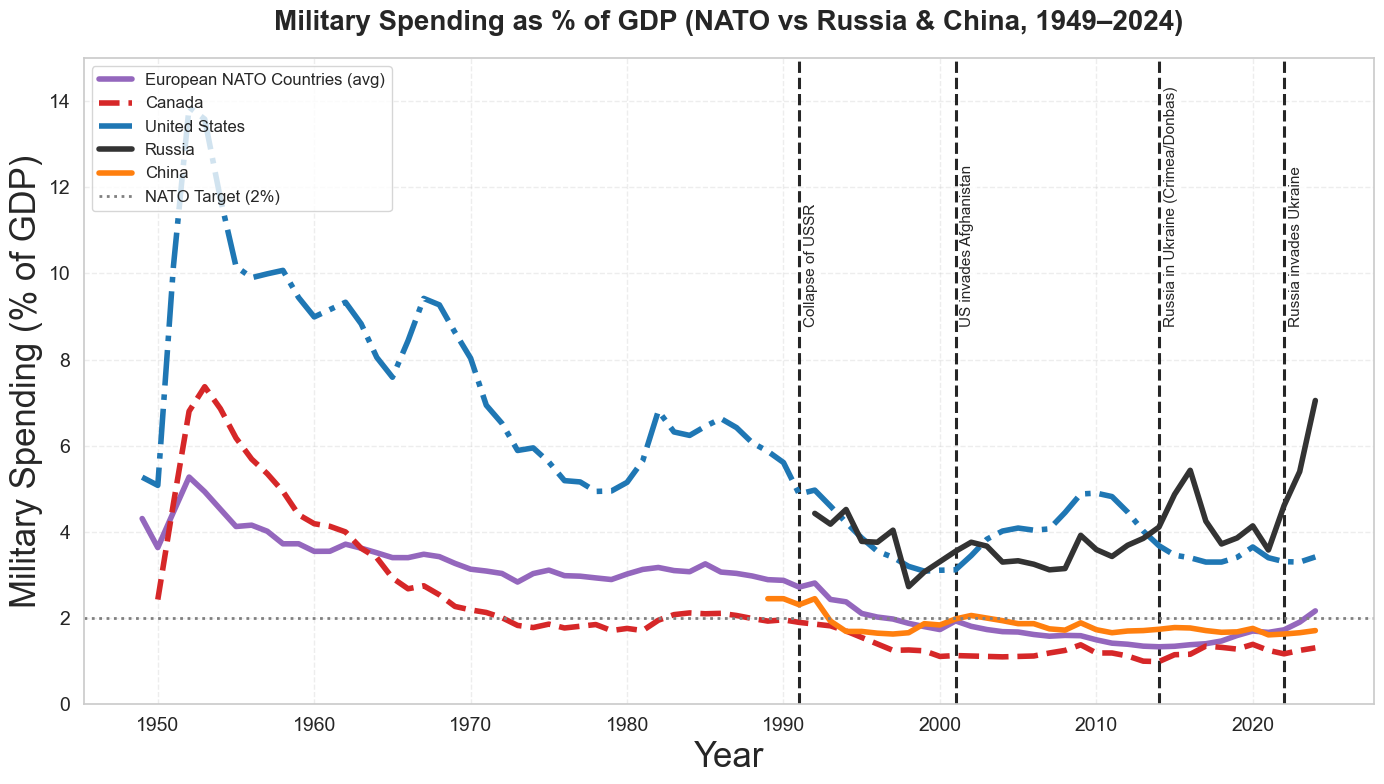

In [70]:
# -----------------------
# Plot with Russia & China (colorblind-friendly palette)
# -----------------------
set_pubstyle()
plt.figure()


plt.plot(
    europe_mean.index, europe_mean.values,
    linewidth=4, color="#9467BD", label="European NATO Countries (avg)"
)

# Canada (red)
plt.plot(
    canada_avg["Year"], canada_avg["Spending"],
    linewidth=4, linestyle="--", color="#D62728", label="Canada"
)

# United States (blue)
plt.plot(
    us_avg["Year"], us_avg["Spending"],
    linewidth=4, linestyle="-.", color="#1F77B4", label="United States"
)

# Russia (black/gray)
plt.plot(
    russia_avg["Year"], russia_avg["Spending"],
    linewidth=4, color="#333333", label="Russia"
)

# China (orange)
plt.plot(
    china_avg["Year"], china_avg["Spending"],
    linewidth=4, color="#FF7F0E", label="China"
)

# NATO guideline
plt.axhline(2, color="gray", linestyle=":", linewidth=2, label="NATO Target (2%)")

# Event markers
# --- Event markers (no overlap: labels above axes, staggered rows) ---
# --- Event markers (including 1991 collapse of USSR) ---
# --- Event markers (labels inside plot, near bottom) ---
ax = plt.gca()

events = [
    (1991, "Collapse of USSR"),
    (2001, "US invades Afghanistan"),
    (2014, "Russia in Ukraine (Crimea/Donbas)"),
    (2022, "Russia invades Ukraine")
]

# Draw the vertical lines
for x, _ in events:
    ax.axvline(x=x, color="black", linestyle="--", linewidth=2.2, alpha=0.85, zorder=1)

# Place labels *inside* the plot, close to bottom
ymin, ymax = ax.get_ylim()
label_y = ymin + 0.1 * (ymax - ymin)   # 10% above bottom

for i, (x, label) in enumerate(events):
    ax.text(
        x + 0.3, label_y+7,
        label,
        rotation=90,               # vertical text looks tidy near lines
        fontsize=11,
        va="bottom", ha="left",
        bbox=dict(facecolor="white", edgecolor="none", alpha=0.8, pad=2),
        zorder=5
    )
ax = plt.gca()
ax.tick_params(axis="both", which="major", labelsize=14)  # bigger major ticks
ax.tick_params(axis="both", which="minor", labelsize=12)  # optional, smaller minor ticks

# Titles & labels
plt.title("Military Spending as % of GDP (NATO vs Russia & China, 1949–2024)", fontsize=20, fontweight="bold", pad=20)
plt.xlabel("Year", fontsize=25)
plt.ylabel("Military Spending (% of GDP)", fontsize=25)
plt.ylim([0,15])
# Legend top-left
plt.legend(loc="upper left", frameon=True)


plt.tight_layout()
plt.show()


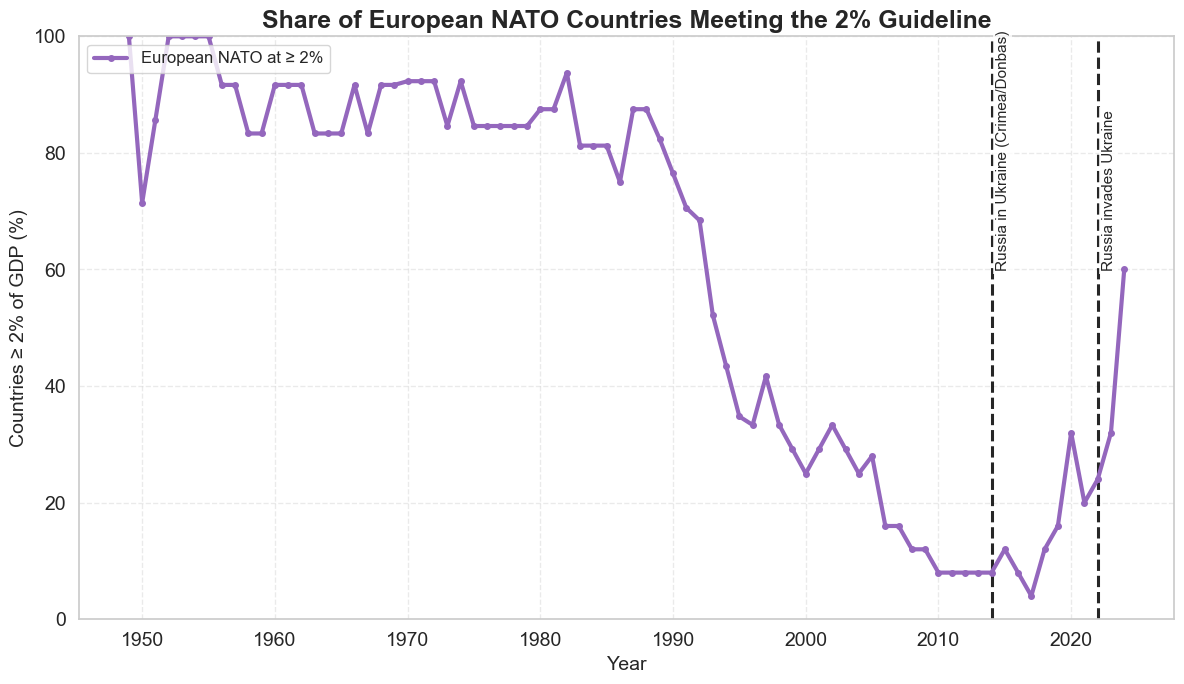

In [76]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter to European NATO countries
eu = nato_long[nato_long["Country"].isin(european_nato)].copy()

# For each year: percentage of countries with Spending >= 2 (only among countries with data that year)
eu_yearly = (
    eu.groupby("Year")["Spending"]
      .agg(total=lambda s: s.notna().sum(),
           hits=lambda s: (s >= 2).sum())
      .reset_index()
)
eu_yearly["pct_above_2"] = eu_yearly["hits"] / eu_yearly["total"] * 100

# Plot
plt.figure(figsize=(12, 7))
plt.plot(
    eu_yearly["Year"], eu_yearly["pct_above_2"],
    linewidth=3, marker="o", markersize=4, color="#9467BD",  # purple (colorblind-friendly)
    label="European NATO at ≥ 2%"
)

events = [
    #(1991, "Collapse of USSR"),
   # (2001, "US invades Afghanistan"),
    (2014, "Russia in Ukraine (Crimea/Donbas)"),
    (2022, "Russia invades Ukraine")
]
ax = plt.gca()

# Draw the vertical lines
for x, _ in events:
    ax.axvline(x=x, color="black", linestyle="--", linewidth=2.2, alpha=0.85, zorder=1)

# Place labels *inside* the plot, close to bottom
ymin, ymax = ax.get_ylim()
label_y = ymin + 0.1 * (ymax - ymin)   # 10% above bottom

for i, (x, label) in enumerate(events):
    ax.text(
        x + 0.3, label_y+50,
        label,
        rotation=90,               # vertical text looks tidy near lines
        fontsize=11,
        va="bottom", ha="left",
        bbox=dict(facecolor="white", edgecolor="none", alpha=0.8, pad=2),
        zorder=5
    )

# Formatting
plt.title("Share of European NATO Countries Meeting the 2% Guideline", fontsize=18, fontweight="bold")
plt.xlabel("Year", fontsize=14)
plt.ylabel("Countries ≥ 2% of GDP (%)", fontsize=14)
plt.ylim(0, 100)
plt.grid(True, linestyle="--", alpha=0.4)
plt.legend(loc="upper left", frameon=True)

# Bigger ticks
ax = plt.gca()
ax.tick_params(axis="both", which="major", labelsize=14)

plt.tight_layout()
plt.show()
